# Reproduce  G. F. Tierney, et. al , Nanoscale Adv., 2019,1, 2546-2552  

This notebook demonstrates reproducing the results of the paper with [Larch](https://xraypy.github.io/xraylarch/xafs/) using the corresponding published dataset (raw data). 


 George F. Tierney, Donato Decarolis,   Norli Abdullah, Scott M. Rogers, Shusaku Hayama, Martha Briceno de Gutierrez, Alberto Villa, C. Richard A. Catlow, Paul Collier, Nikolaos Dimitratos  and  Peter P. Wells (2019) **Extracting structural information of Au colloids at ultra-dilute concentrations: identification of growth during nanoparticle immobilization.** Nanoscale Advances. V. 1. pp. 2546-2552. DOI: [10.1039/C9NA00159J](https://doi.org/10.1039/C9NA00159J).

- **Corresponding author**: Nikolaos Dimitratos
- **E-mail**: nikolaos.dimitratos@unibo.it

The data used for reproducing the results was published in the Southampton Instituional Repository [doi:10.5258/SOTON/D0921](https://eprints.soton.ac.uk/431377/)

For more details about Larch, see [Larch Website](https://xraypy.github.io/xraylarch/xafs/)

## Reproducing XAS analysis

The XAS results of the paper are in [Figure 3](https://pubs.rsc.org/image/article/2019/na/c9na00159j/c9na00159j-f3_hi-res.gif): with the caption and the metadata indicate which data can be used for reproducing the results presented.

**Figure Caption**
> **Fig. 3** XAFS taken at the Au L3-edge of the colloidal Au samples; **(a & d) XANES spectra for the colloidal Au** detailing change as a result of increasing synthesis temperature and Au concentration, **(b & e) the normalised first derivative** of the absorption for the temperature and Au concentration influenced colloids respectively and (c & f) **experimental Fourier transform (FT) chi(k) data** of the corresponding EXAFS signals for colloidal Au showing the influence of temperature and Au concentration. 



In [1]:
# Library with the functions that replicate athena:
# normalisation, merging, re-binning, LCF
# and visualisation (plotting)
import lib.manage_athena as athenamgr  

import lib.manage_fit as fitmgr

# File handling
from pathlib import Path

#plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline 

gold_data = "C:\harwell\PSDI_test\wf_data\pub_267\DS0211\Compiled_XAS_data_Colloid_and_TiO2_supported_Au.prj"
# read the input file 

data_prj = athenamgr.read_project(gold_data)
standard_mappings={"A1":"d_0_1mM_Au_1C_Colloid",
                   "A2":"d_0_1mM_Au_25C_Colloid",
                   "A3":"d_0_1mM_Au_50C_Colloid",
                   "A4":"d_0_1mM_Au_75C_Colloid",
                   "B":"d_0_05mM_Au_1C_Colloid",
                   "C":"d_1_25mM_Au_1C_Colloid",
                   "Au Foil":"Au_foil",}

data_groups = {}
for a_mapping in standard_mappings:
    data_groups[a_mapping] = athenamgr.calc_with_defaults(athenamgr.get_group(data_prj, standard_mappings[a_mapping]))
    
    data_groups[a_mapping].filename = a_mapping



### Reproduce figure 3a 


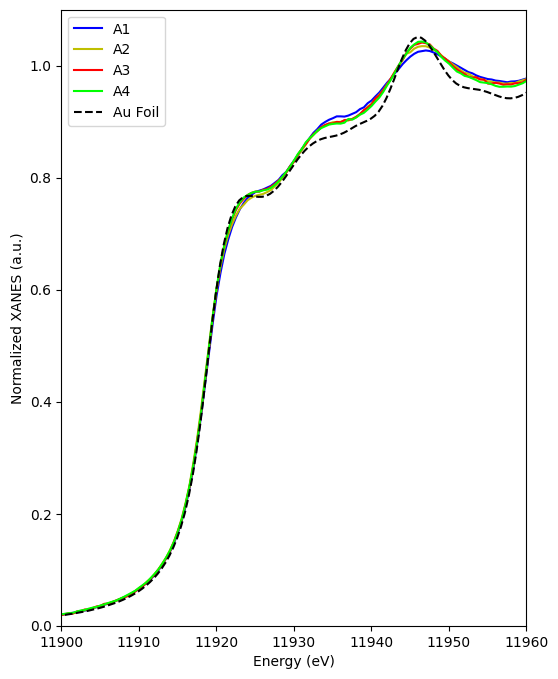

<Figure size 300x400 with 0 Axes>

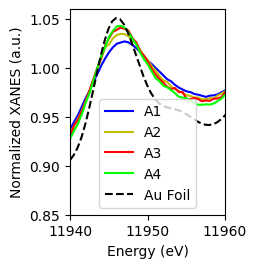

<Figure size 640x480 with 0 Axes>

In [2]:
def plot_normalised(athena_groups = {}, include_groups = {}, aspect = (6,8), xlim=[],ylim=[]):
    plt.figure(figsize=aspect)
    for g_indx, a_group in enumerate(include_groups):
        if athena_groups[a_group].filename in include_groups:
                plt.plot(athena_groups[a_group].energy, 
                         athena_groups[a_group].norm, 
                         label=athena_groups[a_group].filename,
                         color = include_groups[a_group][0],
                         linestyle = include_groups[a_group][1]
                        ) 

    frame1 = plt.gca()
    #frame1.axes.yaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticklabels([])
    plt.ylabel("Normalized XANES (a.u.)")
    plt.xlabel("Energy (eV)")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.show()

    return plt


#define dict to set colours and line stiles
plot_groups = {"A1":["b", "solid"], "A2":["y", "solid"], 
               "A3":['r', "solid"], "A4":["lime", "solid"], 
               "Au Foil":["black", "dashed"]}
# large plot
plt = plot_normalised(data_groups, plot_groups, (6,8),[11900, 11960],[0,1.1])
plt.show()

# subplot
plt.figure(figsize=(3,4))
plt = plot_normalised(data_groups, plot_groups, (2,2.6666),[11940, 11960],[0.85,1.06])
fig = plt.figure(frameon=False)
plt.show()
    


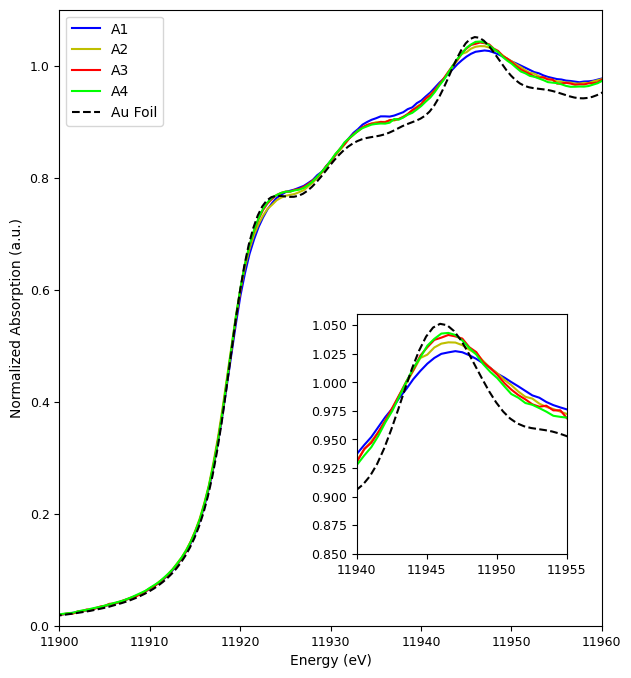

In [3]:
import matplotlib.pyplot as plt

# individaul normal plots
def normal_subplot(a_subplt, athena_groups = {}, include_groups = {}, xlim=[],ylim=[], s_legend = True):
    for g_indx, a_group in enumerate(include_groups):
        if athena_groups[a_group].filename in include_groups:
                a_subplt.plot(athena_groups[a_group].energy,
                              athena_groups[a_group].norm, 
                              label=athena_groups[a_group].filename,
                              color = include_groups[a_group][0],
                              linestyle = include_groups[a_group][1]
                             )                 
    if s_legend:
        a_subplt.legend() # show legend
        a_subplt.set_ylabel("Normalized Absorption (a.u.)")
        a_subplt.set_xlabel("Energy (eV)")
    a_subplt.set_xlim(xlim)
    a_subplt.set_ylim(ylim)
    a_subplt.tick_params(axis='both', which='major', labelsize=9)
    return a_subplt

fig, ax1 = plt.subplots(figsize=(7, 8))
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.55, 0.2, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

ax1 = normal_subplot(ax1, data_groups, plot_groups,[11900, 11960],[0,1.1])
ax2 = normal_subplot(ax2, data_groups, plot_groups, [11940, 11955],[0.85,1.06], False)

plt.show()

### Reproduce figure 3b


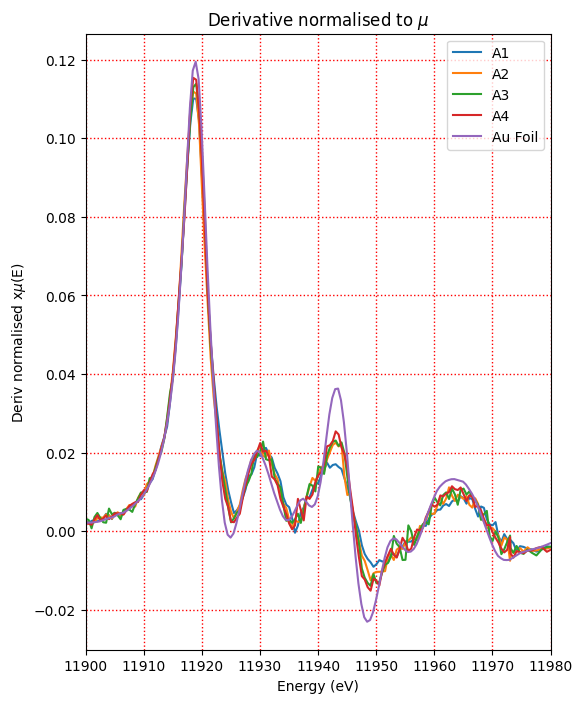

In [4]:
# plot the derivative
plt.figure(figsize=(6,8))
for a_sample in plot_groups:
    if data_groups[a_sample].filename in plot_groups:
        plt = athenamgr.plot_derivative(data_groups[a_sample])
        
    
    
plt.xlim([11900, 11980])
plt.show()


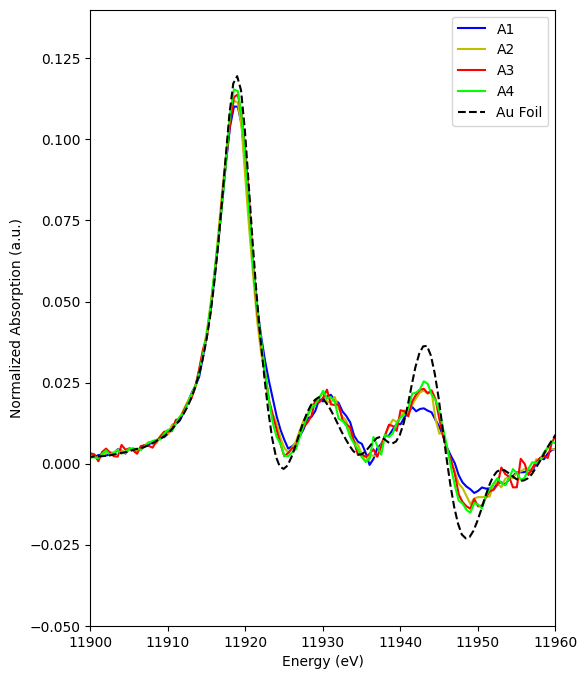

In [5]:
#plot the derivative
        
def plot_derivative(athena_groups = {}, include_groups = {}, aspect = (6,8), xlim=[],ylim=[]):
    plt.figure(figsize=aspect)
    for g_indx, a_group in enumerate(include_groups):
        if athena_groups[a_group].filename in include_groups:
                plt.plot(athena_groups[a_group].energy, 
                         athena_groups[a_group].dmude, 
                         label=athena_groups[a_group].filename,
                         color = include_groups[a_group][0],
                         linestyle = include_groups[a_group][1]
                        ) 

    frame1 = plt.gca()
    #frame1.axes.yaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticklabels([])
    plt.ylabel("Normalized Absorption (a.u.)")
    plt.xlabel("Energy (eV)")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.show()

    return plt
    
# large plot
plt = plot_derivative(data_groups, plot_groups, (6,8),[11900, 11960],[-0.05,0.14])
plt.show()



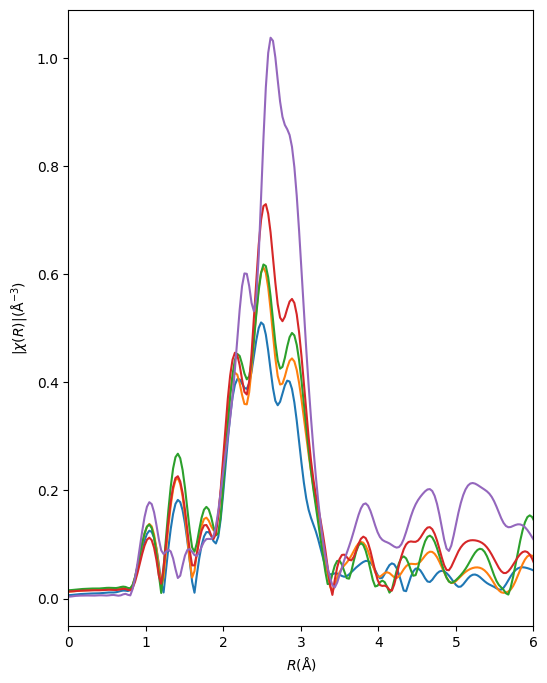

In [6]:
# large plot
def plot_chi_magnitude(athena_groups = {}, include_groups = [], aspect = (6,8), xlim=[]):
    # plot using the xas data for Fe    
    plt.figure(figsize=aspect)
    for g_indx, a_group in enumerate(include_groups):
        # get index of energy value closer to where the label shoud be placed
         plt.plot(athena_groups[a_group].r, athena_groups[a_group].chir_mag  )


    plt.ylabel("$|\chi(R)| (\mathrm{\AA}^{-3})$")
    plt.xlabel("$R(\mathrm{\AA})$")
    plt.xlim(xlim)

    return plt

plt = plot_chi_magnitude(data_groups, plot_groups, (6,8), [0,6])


plt.show()



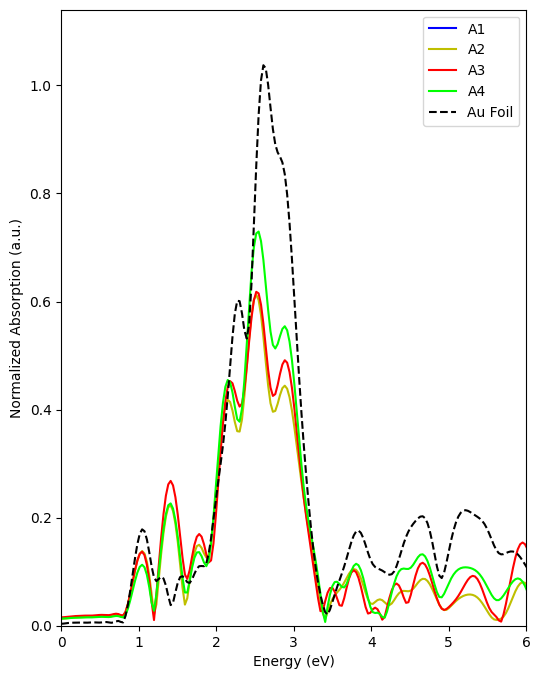

In [14]:
#plot the derivative
        
def plot_chi_magnitude(athena_groups = {}, include_groups = {}, aspect = (6,8), xlim=[],ylim=[]):
    plt.figure(figsize=aspect)
    for g_indx, a_group in enumerate(include_groups):
        if athena_groups[a_group].filename in include_groups:
                plt.plot(athena_groups[a_group].r, 
                         athena_groups[a_group].chir_mag, 
                         label=athena_groups[a_group].filename,
                         color = include_groups[a_group][0],
                         linestyle = include_groups[a_group][1]
                        ) 

    frame1 = plt.gca()
    #frame1.axes.yaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticklabels([])
    plt.ylabel("Normalized Absorption (a.u.)")
    plt.xlabel("Energy (eV)")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.show()

    return plt
    
# large plot
plt = plot_chi_magnitude(data_groups, plot_groups, (6,8),[0,6],[0,1.14])
plt.show()